In [1]:
# importing the required libraries
import pandas as pd
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.__version__

'1.3.5'

In [3]:
df=pd.read_excel(r'E:\Study\mini project\Files\India.xlsx')
df_india = df.copy()
print(df)


FileNotFoundError: ignored

In [ ]:
# Coordinates of India States and Union Territories
India_coord = pd.read_excel(r'E:\Study\mini project\Files\Indian Coordinates.xlsx')
#Day by day data of India, Korea, Italy and Wuhan
dbd_India = pd.read_excel(r'E:\Study\mini project\Files\per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel(r'E:\Study\mini project\Files\per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel(r'E:\Study\mini project\Files\per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel(r'E:\Study\mini project\Files\per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")
print(India_coord)

                      Name of State / UT   Latitude  Longitude
0                   Andaman And Nicobar   11.667026  92.735983
1                         Andhra Pradesh  14.750429  78.570026
2                     Arunachal Pradesh   27.100399  93.616601
3                                 Assam   26.749981  94.216667
4                                 Bihar   25.785414  87.479973
5                            Chandigarh   30.719997  76.780006
6                          Chhattisgarh   22.090420  82.159987
7                Dadra And Nagar Haveli   20.266578  73.016618
8                                  Delhi  28.669993  77.230004
9                                   Goa   15.491997  73.818001
10                               Haryana  28.450006  77.019991
11                     Himachal Pradesh   31.100025  77.166597
12  Union Territory of Jammu and Kashmir  33.450000  76.240000
13                            Jharkhand   23.800393  86.419986
14                             Karnataka  12.570381  76

In [ ]:
print(dbd_India)

         Date  Total Cases  New Cases  Days after surpassing 100 cases
0  2020-01-30            1          1                              NaN
1  2020-01-31            1          0                              NaN
2  2020-02-01            1          0                              NaN
3  2020-02-02            2          1                              NaN
4  2020-02-03            3          1                              NaN
5  2020-02-04            3          0                              NaN
6  2020-02-05            3          0                              NaN
7  2020-02-06            3          0                              NaN
8  2020-02-07            3          0                              NaN
9  2020-02-08            3          0                              NaN
10 2020-02-09            3          0                              NaN
11 2020-02-10            3          0                              NaN
12 2020-02-11            3          0                              NaN
13 202

In [ ]:
print(dbd_Italy)

         Date  Total Cases  New Cases  Days after surpassing 100 cases
0  2020-01-31            2          2                              NaN
1  2020-02-01            2          0                              NaN
2  2020-02-02            2          0                              NaN
3  2020-02-03            2          0                              NaN
4  2020-02-04            2          0                              NaN
5  2020-02-05            2          0                              NaN
6  2020-02-06            3          1                              NaN
7  2020-02-07            3          0                              NaN
8  2020-02-08            3          0                              NaN
9  2020-02-09            3          0                              NaN
10 2020-02-10            3          0                              NaN
11 2020-02-11            3          0                              NaN
12 2020-02-12            3          0                              NaN
13 202

In [ ]:
df.drop(['S. No.'],axis=1,inplace=True)
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020):', total_cases)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020): 562


In [ ]:
df.style.background_gradient(cmap='Reds')


,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,9,0,0,0,9


In [ ]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 512


,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


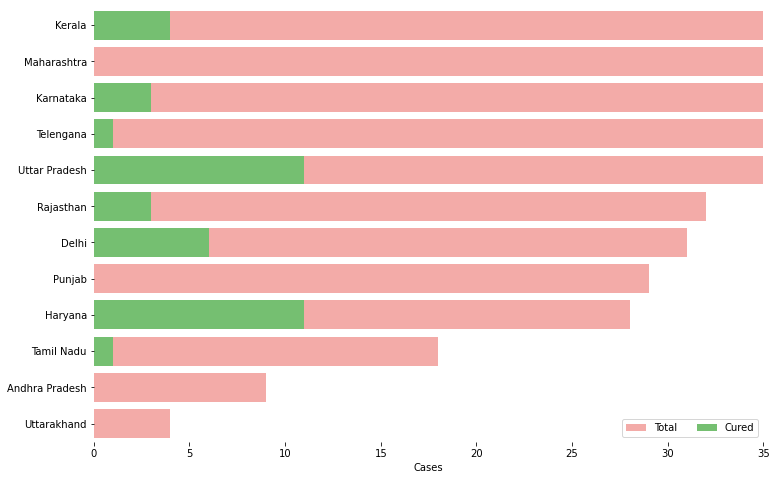

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
df_full = pd.merge(India_coord,df,on='Name of State / UT')
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="r")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="g")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [ ]:
df = pd.read_csv('E:\\Study\\mini project\\Files\\covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df_confirmed = pd.read_csv("E:\\Study\\mini project\\Files\\time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("E:\\Study\\mini project\\Files\\time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("E:\\Study\\mini project\\Files\\time_series_covid19_deaths_global.csv")
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.head()
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0


In [ ]:
from fbprophet import Prophet 
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0
61,2020-03-23,336004.0
